carga, normalización y preparación de los datos para el clustering

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Define el path de tu archivo
file_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/filtered_consolidated_data.xlsx"

# Cargar los datos
data = pd.read_excel(file_path, sheet_name="Sheet1")

# Inspección básica
print("Información del dataset:")
print(data.info())

# Selección de variables numéricas para normalización
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Normalización (Z-score normalization)
scaler = StandardScaler()
data_normalized = data.copy()
data_normalized[numeric_vars] = scaler.fit_transform(data[numeric_vars])

# Guardar los datos normalizados en un nuevo archivo para futuras etapas
output_path = os.path.join(
    os.path.dirname(file_path), "normalized_data.xlsx"
)
data_normalized.to_excel(output_path, index=False)

print(f"Datos normalizados guardados en: {output_path}")


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7141 entries, 0 to 7140
Data columns (total 92 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Tensión: L1 (V)                    7141 non-null   float64       
 1   Tensión: L2 (V)                    7141 non-null   float64       
 2   Tensión: L3 (V)                    7141 non-null   float64       
 3   Tensión: L1 - L2 (V)               7141 non-null   float64       
 4   Tensión: L2 - L3 (V)               7141 non-null   float64       
 5   Tensión: L3 - L1 (V)               7141 non-null   float64       
 6   timestamp                          7141 non-null   datetime64[ns]
 7   Corriente: L1 (A)                  7141 non-null   float64       
 8   Corriente: L2 (A)                  7141 non-null   float64       
 9   Corriente: L3 (A)                  7141 non-null   float64       
 10  Factor de p

Código para Clustering y #optimo de clusters 

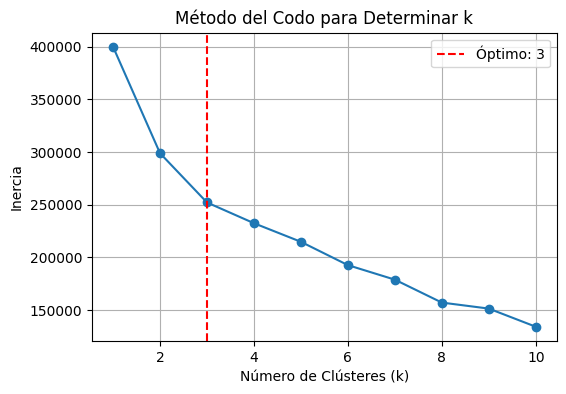

Número óptimo de clústeres identificado: 3
Clustering completado con 3 clústeres.
Datos con clústeres guardados en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx


In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from kneed import KneeLocator

# Paso 1: Cargar los datos normalizados
normalized_data_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data.xlsx"
data_normalized = pd.read_excel(normalized_data_path)

# Seleccionar variables numéricas
numeric_vars = data_normalized.select_dtypes(include=['float64', 'int64']).columns
X = data_normalized[numeric_vars]

# Paso 2: Calcular inercia para diferentes números de clústeres
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Paso 3: Determinar el número óptimo de clústeres utilizando KneeLocator
knee_locator = KneeLocator(cluster_range, inertia, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Gráfica del Método del Codo
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, inertia, marker='o')
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Óptimo: {optimal_clusters}')
plt.xlabel("Número de Clústeres (k)")
plt.ylabel("Inercia")
plt.title("Método del Codo para Determinar k")
plt.legend()
plt.grid()
plt.show()

# Paso 4: Realizar clustering con el número óptimo de clústeres
print(f"Número óptimo de clústeres identificado: {optimal_clusters}")
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data_normalized['Cluster'] = kmeans.fit_predict(X)

# Guardar los datos con clústeres
output_path_with_clusters = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_normalized.to_excel(output_path_with_clusters, index=False)

print(f"Clustering completado con {optimal_clusters} clústeres.")
print(f"Datos con clústeres guardados en: {output_path_with_clusters}")


Distribución de los Clústeres y Visualización

Distribución de muestras por Clúster:
   Cluster  Cantidad de Muestras
0        0                  1385
1        1                  3165
2        2                  2591
Distribución de clústeres guardada en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_distribution.xlsx


/tmp/ipykernel_5445/1721579144.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Cantidad de Muestras', data=cluster_counts_df, palette='viridis')


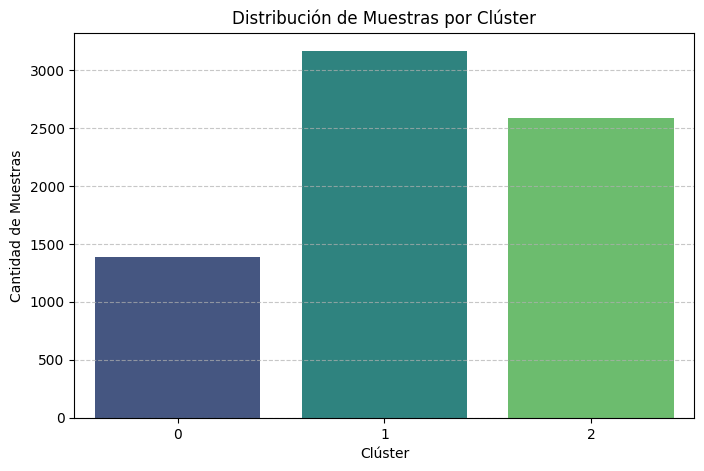

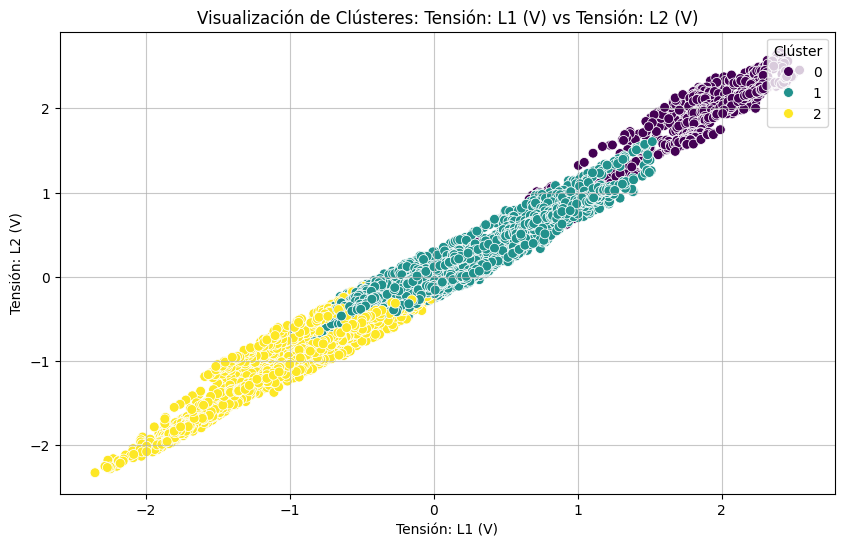

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos con clústeres
data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_with_clusters = pd.read_excel(data_with_clusters_path)

# Paso 1: Generar la tabla de distribución de clústeres
cluster_counts = data_with_clusters['Cluster'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Cantidad de Muestras']

print("Distribución de muestras por Clúster:")
print(cluster_counts_df)

# Guardar la distribución en un archivo
cluster_distribution_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_distribution.xlsx"
cluster_counts_df.to_excel(cluster_distribution_path, index=False)
print(f"Distribución de clústeres guardada en: {cluster_distribution_path}")

# Paso 2: Visualización de la distribución de clústeres
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Cantidad de Muestras', data=cluster_counts_df, palette='viridis')
plt.title("Distribución de Muestras por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Muestras")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Paso 3: Visualización de clústeres en el espacio
# Seleccionar variables clave para la visualización
var_x = 'Tensión: L1 (V)'  # Cambiar a una variable clave de interés
var_y = 'Tensión: L2 (V)'  # Cambiar a una variable clave de interés

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=var_x, y=var_y, hue='Cluster', data=data_with_clusters, palette='viridis', s=50
)
plt.title(f"Visualización de Clústeres: {var_x} vs {var_y}")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend(title="Clúster", loc='upper right')
plt.grid(alpha=0.7)
plt.show()


Análisis de Varianza y Correlación

In [4]:
import pandas as pd
import numpy as np
import os

# Cargar los datos con la columna 'Cluster'
data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
data_with_clusters = pd.read_excel(data_with_clusters_path)

# Verificar que la columna 'Cluster' exista
if 'Cluster' not in data_with_clusters.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos. Verifica el paso previo.")

# Seleccionar columnas numéricas
numeric_columns = data_with_clusters.select_dtypes(include=[np.number]).columns

# Paso 1: Calcular la varianza dentro de cada clúster
cluster_variance = {}
for cluster in data_with_clusters['Cluster'].unique():
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster][numeric_columns]
    var_by_cluster = cluster_data.var()
    cluster_variance[cluster] = var_by_cluster

# Convertir el diccionario a un DataFrame para facilitar la visualización
cluster_variance_df = pd.DataFrame(cluster_variance)
cluster_variance_df['Mean_Variance'] = cluster_variance_df.mean(axis=1)
important_variables_by_variance = cluster_variance_df['Mean_Variance'].sort_values(ascending=False)

# Paso 2: Calcular la correlación con la columna 'Cluster'
# Convertir 'Cluster' a numérico para el cálculo de correlación
data_with_clusters['Cluster_numeric'] = data_with_clusters['Cluster'].astype(float)

# Crear lista de columnas numéricas junto con 'Cluster_numeric'
numeric_columns_with_cluster = numeric_columns.tolist() + ['Cluster_numeric']

# Calcular la matriz de correlación completa
correlation_matrix = data_with_clusters[numeric_columns_with_cluster].corr()

# Extraer las correlaciones con 'Cluster_numeric'
correlations = correlation_matrix['Cluster_numeric'].drop(labels=['Cluster_numeric']).sort_values(ascending=False)

# Paso 3: Crear un DataFrame final con los resultados
analysis_results = pd.DataFrame({
    'Variable': important_variables_by_variance.index,
    'Mean_Variance': important_variables_by_variance.values,
    'Correlation_with_Cluster': correlations.reindex(important_variables_by_variance.index, fill_value=np.nan)
})

# Agregar información del clúster a las variables
cluster_importance = data_with_clusters.groupby('Cluster')[numeric_columns].mean().transpose()
analysis_results = analysis_results.merge(cluster_importance, left_on='Variable', right_index=True, how='left')

# Paso 4: Exportar el DataFrame a un archivo Excel
output_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx"
analysis_results.to_excel(output_path, index=False)

print(f"Archivo Excel generado: {output_path}")
print("\nVariables ordenadas por importancia (varianza media) y correlación con el clúster:")
print(analysis_results)


Archivo Excel generado: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx

Variables ordenadas por importancia (varianza media) y correlación con el clúster:
                                                            Variable  \
Factor de potencia: L2 +                    Factor de potencia: L2 +   
Armónicos IL2: Armónico 11 (%IL2)  Armónicos IL2: Armónico 11 (%IL2)   
Factor de potencia: L3 +                    Factor de potencia: L3 +   
Factor de potencia: L1 +                    Factor de potencia: L1 +   
Armónicos VL3: Armónico 2 (%VL3)    Armónicos VL3: Armónico 2 (%VL3)   
...                                                              ...   
Armónicos VL3: Armónico 10 (%VL3)  Armónicos VL3: Armónico 10 (%VL3)   
Armónicos VL3: Armónico 12 (%VL3)  Armónicos VL3: Armónico 12 (%VL3)   
Armónicos VL3: Armónico 14 (%VL3)  Armónicos VL3: Armónico 14 (%VL3)   
Armónicos VL3: Armónico 15 (%VL3)  Armónicos VL3: Armónico 15 (%VL3)   
Cluster 

Selección Automática de Variables

In [5]:
import pandas as pd
import numpy as np

# Ruta correcta del archivo proporcionado
analysis_results_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/analysis_results_with_clusters.xlsx"

# Leer los resultados del análisis
analysis_results = pd.read_excel(analysis_results_path)

# Definir umbrales dinámicos para la selección de variables
variance_threshold = analysis_results['Mean_Variance'].mean()  # Promedio de varianza como umbral
correlation_threshold = 0.3  # Umbral fijo para la correlación con los clústeres (positivo o negativo)

# Seleccionar variables que cumplan con ambos criterios
selected_variables = analysis_results[
    (analysis_results['Mean_Variance'] > variance_threshold) &
    (analysis_results['Correlation_with_Cluster'].abs() > correlation_threshold)
]

# Verificar si hay variables seleccionadas
if selected_variables.empty:
    print("No se encontraron variables que cumplan con los criterios establecidos.")
else:
    # Exportar las variables seleccionadas a un nuevo archivo
    selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx"
    selected_variables.to_excel(selected_variables_path, index=False)
    print(f"Variables seleccionadas guardadas en: {selected_variables_path}")
    print("\nVariables seleccionadas:")
    print(selected_variables[['Variable', 'Mean_Variance', 'Correlation_with_Cluster']])


Variables seleccionadas guardadas en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables.xlsx

Variables seleccionadas:
                             Variable  Mean_Variance  Correlation_with_Cluster
6    Armónicos VL2: Armónico 3 (%VL2)       0.922000                 -0.526458
7   Armónicos VL2: Armónico 13 (%VL2)       0.917469                 -0.416441
8             Flicker (Pst): L1 (Pst)       0.900439                 -0.315479
21   Armónicos IL1: Armónico 2 (%IL1)       0.692942                  0.397402
24   Armónicos IL2: Armónico 7 (%IL2)       0.652869                  0.359310
26  Armónicos VL1: Armónico 11 (%VL1)       0.520880                 -0.431416
28   Armónicos IL1: Armónico 3 (%IL1)       0.497698                  0.421635
29                  Corriente: L3 (A)       0.483335                  0.557592
30  Distorsión armónica: IL1 (%I THD)       0.480705                  0.410165
31   Armónicos IL1: Armónico 7 (%IL1)       0.480282              

Visualización de Clústeres

después de visualizar la distribución de los clústeres, podemos agregar un paso para que el usuario defina el subsistema que se va a analizar. Esto permite adaptar el análisis posterior (como la selección de variables y la interpretación) al contexto del subsistema seleccionado.

y la selección de variables relevantes basadas en correlación y varianza. de manera automatica 

Visualizando la distribución de los clústeres...
Cantidad de muestras por Clúster:
   Cluster  Cantidad de Muestras
0        0                  1388
1        1                  2258
2        2                  1049
3        3                  2446


/tmp/ipykernel_93444/1568812936.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data_normalized, palette='viridis')


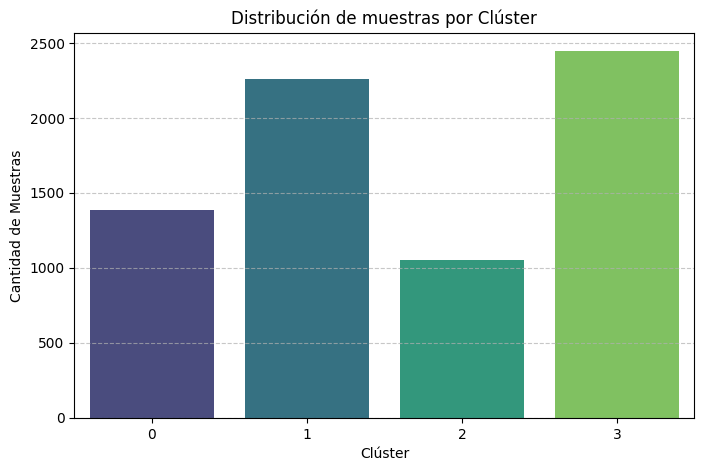

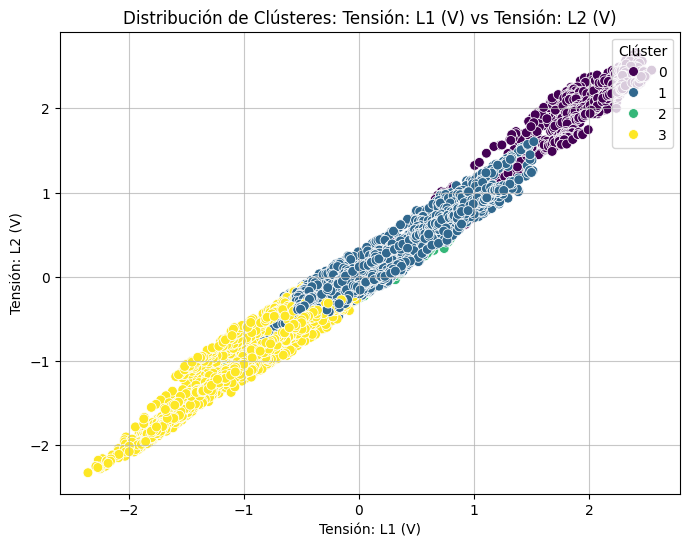

Análisis seleccionado para el subsistema: Subestación de Distribución
Seleccionando variables clave basadas en varianza y correlación...
Variables clave seleccionadas para el subsistema 'Subestación de Distribución':
['Distorsión armónica: VL1 (%V THD)', 'Armónicos VL3: Armónico 5 (%VL3)', 'Tensión: L3 (V)', 'Distorsión armónica: VL3 (%V THD)', 'Distorsión armónica: VL2 (%V THD)', 'Armónicos VL2: Armónico 5 (%VL2)', 'Corriente: L2 (A)', 'Tensión: L1 - L2 (V)', 'Tensión: L3 - L1 (V)', 'Armónicos VL1: Armónico 5 (%VL1)', 'Corriente: L3 (A)', 'Tensión: L2 - L3 (V)', 'Tensión: L1 (V)', 'Tensión: L2 (V)']
Datos con variables seleccionadas guardados en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables_analysis.xlsx


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Cargar los datos actualizados y análisis previo
normalized_data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
cluster_analysis_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_analysis.xlsx"

# Cargar los datos actualizados
data_normalized = pd.read_excel(normalized_data_with_clusters_path)

# Verificar que la columna 'Cluster' exista
if 'Cluster' not in data_normalized.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos actualizados.")

# Cargar resultados de varianza y correlación
cluster_variance = pd.read_excel(cluster_analysis_path, sheet_name='Cluster Variance', index_col=0)
correlations = pd.read_excel(cluster_analysis_path, sheet_name='Correlations', index_col=0)['Cluster']

# Paso 2: Visualización de los clústeres
print("Visualizando la distribución de los clústeres...")

# Generar una tabla con la cantidad de datos por clúster
cluster_counts = data_normalized['Cluster'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Cantidad de Muestras']
print("Cantidad de muestras por Clúster:")
print(cluster_counts_df)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_normalized, palette='viridis')
plt.title("Distribución de muestras por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Muestras")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de dispersión entre dos variables clave
var_x = 'Tensión: L1 (V)'  # Cambiar a una variable clave de interés
var_y = 'Tensión: L2 (V)'  # Cambiar a una variable clave de interés
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=var_x, y=var_y, hue='Cluster', data=data_normalized, palette='viridis', s=50
)
plt.title(f"Distribución de Clústeres: {var_x} vs {var_y}")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend(title="Clúster", loc='upper right')
plt.grid(alpha=0.7)
plt.show()

# Paso 3: Definir Subsistema
tipo_subsistema = input("Ingrese el tipo de subsistema a analizar (ejemplo: 'Subestación de Distribución'): ")
print(f"Análisis seleccionado para el subsistema: {tipo_subsistema}")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Cargar los datos actualizados y análisis previo
normalized_data_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"
cluster_analysis_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/cluster_analysis.xlsx"

# Cargar los datos actualizados
data_normalized = pd.read_excel(normalized_data_with_clusters_path)

# Verificar que la columna 'Cluster' exista
if 'Cluster' not in data_normalized.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos actualizados.")

# Cargar resultados de varianza y correlación
cluster_variance = pd.read_excel(cluster_analysis_path, sheet_name='Cluster Variance', index_col=0)
correlations = pd.read_excel(cluster_analysis_path, sheet_name='Correlations', index_col=0)['Cluster']

# Paso 2: Visualización de los clústeres
print("Visualizando la distribución de los clústeres...")

# Generar una tabla con la cantidad de datos por clúster
cluster_counts = data_normalized['Cluster'].value_counts().sort_index()
cluster_counts_df = cluster_counts.reset_index()
cluster_counts_df.columns = ['Cluster', 'Cantidad de Muestras']
print("Cantidad de muestras por Clúster:")
print(cluster_counts_df)

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data_normalized, palette='viridis')
plt.title("Distribución de muestras por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Muestras")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de dispersión entre dos variables clave
var_x = 'Tensión: L1 (V)'  # Cambiar a una variable clave de interés
var_y = 'Tensión: L2 (V)'  # Cambiar a una variable clave de interés
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=var_x, y=var_y, hue='Cluster', data=data_normalized, palette='viridis', s=50
)
plt.title(f"Distribución de Clústeres: {var_x} vs {var_y}")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend(title="Clúster", loc='upper right')
plt.grid(alpha=0.7)
plt.show()

# Paso 3: Definir Subsistema
tipo_subsistema = input("Ingrese el tipo de subsistema a analizar (ejemplo: 'Subestación de Distribución'): ")
print(f"Análisis seleccionado para el subsistema: {tipo_subsistema}")

# Paso 4: Selección de variables clave
print("Seleccionando variables clave basadas en varianza y correlación...")

# Definir umbrales
correlation_threshold = 0.5  # Umbral mínimo de correlación
variance_threshold = 0.01   # Umbral mínimo de varianza entre clústeres

# Variables con alta correlación
high_correlation_vars = correlations[correlations.abs() > correlation_threshold].index.tolist()

# Variables con alta varianza entre clústeres
high_variance_vars = cluster_variance.columns[
    cluster_variance.max(axis=0) > variance_threshold
].tolist()

# Combinar criterios
selected_variables = list(set(high_correlation_vars) & set(high_variance_vars))

if not selected_variables:
    raise ValueError(f"No se encontraron variables relevantes con los criterios de correlación > {correlation_threshold} y varianza > {variance_threshold}")

# Filtrar los datos con las variables seleccionadas
data_clave = data_normalized[selected_variables]

# Paso 5: Mostrar las variables seleccionadas
print(f"Variables clave seleccionadas para el subsistema '{tipo_subsistema}':")
print(selected_variables)

# Paso 6: Guardar los datos con las variables seleccionadas
selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables_analysis.xlsx"
data_clave.to_excel(selected_variables_path, index=False)

print(f"Datos con variables seleccionadas guardados en: {selected_variables_path}")

# Paso 4: Selección de variables clave
print("Seleccionando variables clave basadas en varianza y correlación...")

# Definir umbrales
correlation_threshold = 0.5  # Umbral mínimo de correlación
variance_threshold = 0.01   # Umbral mínimo de varianza entre clústeres

# Variables con alta correlación
high_correlation_vars = correlations[correlations.abs() > correlation_threshold].index.tolist()

# Variables con alta varianza entre clústeres
high_variance_vars = cluster_variance.columns[
    cluster_variance.max(axis=0) > variance_threshold
].tolist()

# Combinar criterios
selected_variables = list(set(high_correlation_vars) & set(high_variance_vars))

if not selected_variables:
    raise ValueError(f"No se encontraron variables relevantes con los criterios de correlación > {correlation_threshold} y varianza > {variance_threshold}")

# Filtrar los datos con las variables seleccionadas
data_clave = data_normalized[selected_variables]

# Paso 5: Mostrar las variables seleccionadas
print(f"Variables clave seleccionadas para el subsistema '{tipo_subsistema}':")
print(selected_variables)

# Paso 6: Guardar los datos con las variables seleccionadas
selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables_analysis.xlsx"
data_clave.to_excel(selected_variables_path, index=False)

print(f"Datos con variables seleccionadas guardados en: {selected_variables_path}")


deteccion de anomalias 

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Paso 1: Cargar los datos con las variables seleccionadas y los clústeres
selected_variables_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/selected_variables_analysis.xlsx"
data_normalized_with_clusters_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/normalized_data_with_clusters.xlsx"

data_selected = pd.read_excel(selected_variables_path)
data_clusters = pd.read_excel(data_normalized_with_clusters_path)

# Asegurarse de que 'Cluster' esté presente
if 'Cluster' not in data_clusters.columns:
    raise KeyError("La columna 'Cluster' no está presente en los datos normalizados con clústeres.")

# Paso 2: Calcular los centroides de cada clúster
numeric_vars = data_selected.columns  # Usamos las variables seleccionadas
centroids = data_clusters.groupby('Cluster')[numeric_vars].mean()

# Calcular la distancia euclidiana de cada punto a su centroide
data_selected['Cluster'] = data_clusters['Cluster']  # Añadir la columna 'Cluster'
distances = cdist(data_selected[numeric_vars], centroids, metric='euclidean')

# Seleccionar la distancia correspondiente al clúster asignado
data_selected['Distancia al Centroide'] = [
    distances[i, int(cluster)] for i, cluster in enumerate(data_selected['Cluster'])
]

# Paso 3: Definir un umbral de anomalía (e.g., percentil 95)
threshold = np.percentile(data_selected['Distancia al Centroide'], 95)
data_selected['Es Anomalía'] = data_selected['Distancia al Centroide'] > threshold

# Paso 4: Guardar resultados
anomaly_results_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/anomaly_detection_results.xlsx"
data_selected.to_excel(anomaly_results_path, index=False)

print(f"Detección de anomalías completada. Resultados guardados en: {anomaly_results_path}")
print(f"Umbral de anomalía definido en: {threshold:.2f}")
print(f"Cantidad de anomalías detectadas: {data_selected['Es Anomalía'].sum()}")


Detección de anomalías completada. Resultados guardados en: /home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/anomaly_detection_results.xlsx
Umbral de anomalía definido en: 3.38
Cantidad de anomalías detectadas: 357


In [25]:
# Cargar los resultados de detección de anomalías
anomaly_results_path = "/home/elicoubuntu/Desktop/Industrial_Insigths/Prognosis/anomaly_detection_results.xlsx"
data_anomalies = pd.read_excel(anomaly_results_path)

# Separar los datos anómalos y normales
anomalies = data_anomalies[data_anomalies['Es Anomalía'] == True]
normal_data = data_anomalies[data_anomalies['Es Anomalía'] == False]

# Resumen estadístico para datos anómalos
print("Estadísticas de las Anomalías:")
print(anomalies.describe())

# Resumen estadístico comparativo
comparative_stats = pd.concat(
    [normal_data.describe(), anomalies.describe()],
    keys=['Normal', 'Anomalías'],
    axis=1
)
print("Estadísticas Comparativas (Normal vs Anomalías):")
print(comparative_stats)


Estadísticas de las Anomalías:
       Distorsión armónica: VL1 (%V THD)  Armónicos VL3: Armónico 5 (%VL3)  \
count                         357.000000                        357.000000   
mean                            0.167068                          0.694287   
std                             1.263527                          1.140749   
min                            -1.395090                         -1.764731   
25%                            -0.760991                          0.187329   
50%                            -0.443941                          0.466195   
75%                             1.458358                          0.745061   
max                             2.726558                          2.697122   

       Tensión: L3 (V)  Distorsión armónica: VL3 (%V THD)  \
count       357.000000                         357.000000   
mean          0.824635                           0.253111   
std           1.103125                           1.288499   
min          -2.349782

/tmp/ipykernel_93444/2718105749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


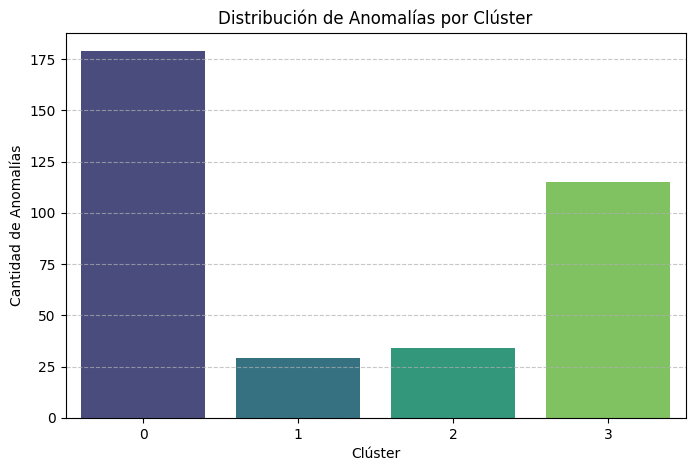

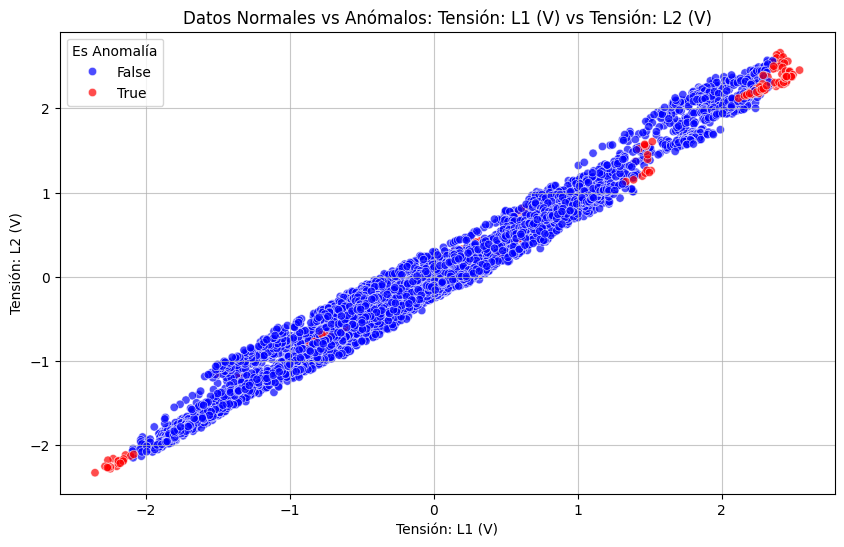

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras: Distribución de anomalías por clúster
plt.figure(figsize=(8, 5))
sns.countplot(
    x='Cluster',
    data=anomalies,
    palette='viridis'
)
plt.title("Distribución de Anomalías por Clúster")
plt.xlabel("Clúster")
plt.ylabel("Cantidad de Anomalías")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de dispersión: Comparación entre datos normales y anómalos
var_x = 'Tensión: L1 (V)'  # Cambiar según interés
var_y = 'Tensión: L2 (V)'  # Cambiar según interés

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=var_x, y=var_y, hue='Es Anomalía', data=data_anomalies,
    palette={True: 'red', False: 'blue'}, alpha=0.7
)
plt.title(f"Datos Normales vs Anómalos: {var_x} vs {var_y}")
plt.xlabel(var_x)
plt.ylabel(var_y)
plt.legend(title="Es Anomalía")
plt.grid(alpha=0.7)
plt.show()
